# Stacked Autoencoder

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


## Define Network

In [39]:
num_input   = 784 
num_hidden1 = 392
num_hidden2 = 196
num_hidden3 = 392 
num_output  = 784

In [40]:
# initialize the normal distribution 
initializer = tf.variance_scaling_initializer(distribution='normal')

# define the weights for each layer
w1 = tf.Variable(initializer([  num_input, num_hidden1]), dtype=tf.float32)
w2 = tf.Variable(initializer([num_hidden1, num_hidden2]), dtype=tf.float32)
w3 = tf.Variable(initializer([num_hidden2, num_hidden3]), dtype=tf.float32)
w4 = tf.Variable(initializer([num_hidden3,  num_output]), dtype=tf.float32)

In [41]:
# define the biases for each layer
b1 = tf.Variable(tf.zeros(num_hidden1))
b2 = tf.Variable(tf.zeros(num_hidden2))
b3 = tf.Variable(tf.zeros(num_hidden3))
b4 = tf.Variable(tf.zeros(num_output))

In [42]:
# input data
input_layer = tf.placeholder(tf.float32, shape=[None, num_input])

In [43]:
hidden_layer1 = tf.nn.relu(tf.matmul(input_layer,   w1) + b1)  # Hidden Layer 1
hidden_layer2 = tf.nn.relu(tf.matmul(hidden_layer1, w2) + b2)  # Hidden Layer 2
hidden_layer3 = tf.nn.relu(tf.matmul(hidden_layer2, w3) + b3)  # Hidden Layer 3

In [44]:
# output layer
output_layer  = tf.matmul(hidden_layer3, w4) + b4

In [45]:
# defining loss function (Mean Squared Error)
loss = tf.reduce_mean(tf.square(output_layer - input_layer))

In [46]:
# learning rate
learning_rate = 0.01

# define the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

## Running the Session

In [55]:
num_epochs = 10
batch_size = 150

# initialize session
with tf.Session() as sess:
    
    # initialize variables
    sess.run(tf.global_variables_initializer())
    
    # train the model
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        # 150 batch size
        for iteration in range(num_batches):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            
            sess.run(optimizer, feed_dict = {input_layer : X_batch})
        
        # calculate overall loss
        training_loss = loss.eval(feed_dict = {input_layer: X_batch})   
        
        print("Epoch {}/10 Complete. Training Loss: {} \r".format(epoch+1,training_loss),end='')
     
    results = output_layer.eval(feed_dict = {input_layer : mnist.test.images[ :5]})     

## Result

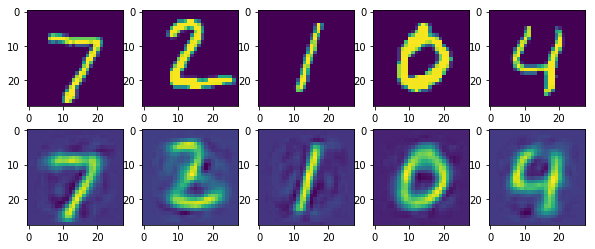

In [59]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 5, figsize=(10, 4))
for i in range(5):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))